# 深度学习平台课程实验教程

## PyTorch入门

**目标**
通过本次实验，你将掌握以下内容：

1. PyTorch 框架的核心组件（张量、自动求导、神经网络模块）。
2. 基础张量操作与API的使用。
3. 使用张量操作和梯度下降法实现线性回归模型

------

### **1. 环境准备**

确保已安装 PyTorch（本节推荐使用最新版本，后续章节按需要选择合适版本）：

#### 使用 conda 安装（需提前安装 Anaconda）
conda install pytorch torchvision torchaudio -c pytorch

#### 或使用 pip 安装（根据CUDA版本选择）
pip install torch torchvision


### **2. 数据操作**
首先，我们导入 torch。请注意，虽然它被称为PyTorch，但我们应该导入 torch 而不是 pytorch

In [ ]:

import torch

print(torch.__version__)

2.5.1+cu124


张量表示由一个数值组成的数组，这个数组可能有多个维度;
可以通过张量的 shape 属性来访问张量的形状 和张量中元素的总数

In [ ]:
x = torch.arange(12)
print(x)
print(x.shape)
print(x.numel())

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
12


要改变一个张量的形状而不改变元素数量和元素值，可以调用 reshape 函数

In [ ]:
X = x.reshape(3, 4)
print(X)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


使用全0、全1、其他常量或者从特定分布中随机采样的数字

In [ ]:
print(torch.zeros((2, 3, 4)))
print(torch.ones((2, 3, 4)))
print(torch.randn(3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[ 0.3343,  1.4316, -0.8722, -0.6937],
        [ 0.4244,  0.0950,  1.9658,  1.1385],
        [ 1.2372, -2.0974,  0.1482, -0.2851]])


通过提供包含数值的 Python 列表（或嵌套列表）来为所需张量中的每个元素赋予确定值

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

常见的标准算术运算符（+、-、*、/ 和 **）都可以被升级为按元素运算

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

我们也可以把多个张量 连结（concatenate） 在一起

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

通过 逻辑运算符 构建二元张量

In [ ]:
print(X == Y)

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])


对张量中的所有元素进行求和会产生一个只有一个元素的张量

In [ ]:
print(X.sum())

tensor(66.)


即使形状不同，我们仍然可以通过调用 广播机制 （broadcasting mechanism） 来执行按元素操作

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
print(a, b)
print(a + b)

tensor([[0],
        [1],
        [2]]) tensor([[0, 1]])
tensor([[0, 1],
        [1, 2],
        [2, 3]])


可以用 [-1] 选择最后一个元素，可以用 [1:3] 选择第二个和第三个元素

In [ ]:
print(X[-1])
print(X[1:3])

tensor([ 8.,  9., 10., 11.])
tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值

In [ ]:
X[0:2, :] = 12
print(X)

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])


转换为 NumPy 张量

In [ ]:
A = X.numpy()
B = torch.tensor(A)
print(type(A), type(B))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


将大小为1的张量转换为 Python 标量

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

Tensor on GPU

In [ ]:
# 以下代码只有在PyTorch GPU版本上才会执行
if torch.cuda.is_available():
    device = torch.device("cuda")          # GPU
    y = torch.ones_like(x, device=device)  # 直接创建一个在GPU上的Tensor
    x = x.to(device)                       # 等价于 .to("cuda")
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # to()还可以同时更改数据类型

### **3.自动求导**

假设我们想对函数$$y=2x^⊤x$$
关于列向量x求导


In [ ]:
import torch

x = torch.arange(4.0)
print(x)

tensor([0., 1., 2., 3.])


在我们计算y关于x的梯度之前，我们需要一个地方来存储梯度

In [ ]:
x.requires_grad_(True)
print(x.grad)

None


现在让我们计算y

In [ ]:
y = 2 * torch.dot(x, x)
print(y)

tensor(28., grad_fn=<MulBackward0>)


通过调用反向传播函数来自动计算y关于x每个分量的梯度

In [ ]:
y.backward() #反向传播
print(x.grad)
print(x.grad == 4 * x)

tensor([ 0.,  4.,  8., 12.])
tensor([True, True, True, True])


现在让我们计算x的另一个函数

In [ ]:
x.grad.zero_() #梯度清零
y = x.sum()
y.backward()
print(x.grad)

tensor([1., 1., 1., 1.])


深度学习中 ，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和

In [ ]:
x.grad.zero_()
y = x * x
y.sum().backward()
print(x.grad)

tensor([0., 2., 4., 6.])


将某些计算移动到记录的计算图之外。  
当我们调用detach()时，会返回一个新的张量，这个张量的requires_grad属性为False，不会有梯度grad。

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach() #u的requires_grad属性为False
z = u * x

z.sum().backward()
print(x.grad == u)

tensor([True, True, True, True])


In [ ]:
x.grad.zero_()
y.sum().backward()
print(x.grad == 2 * x)

tensor([True, True, True, True])


即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

print(a.grad == d / a)

tensor(True)


### **4.从零实现线性回归模型**
我们将从零开始实现整个方法，包括数据流水线、模型、损失函数和小批量随机梯度下降优化器

In [ ]:
import random
import torch

根据带有噪声的线性模型构造一个人造数据集。 我们使用线性模型参数w=[2,−3.4]⊤、b=4.2和噪声项ϵ
生成数据集及其标签：y=Xw+b+ϵ

In [ ]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

features 中的每一行都包含一个二维数据样本，labels 中的每一行都包含一维标签值（一个标量）

In [ ]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 0.4619, -0.0605]) 
label: tensor([5.3329])


使用 matplotlib 来绘制散点图。我们这里展示第二个特征(Feature 1)与标签之间的关系。  
可以使用  pip install matplotlib  命令进行安装

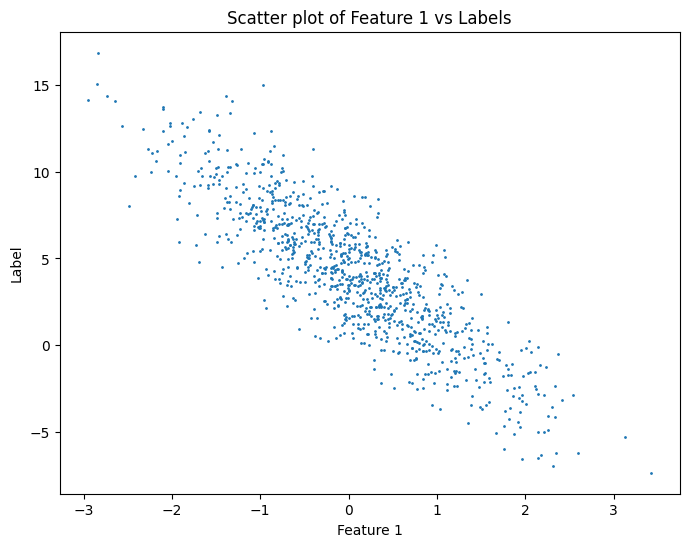

In [ ]:
import matplotlib.pyplot as plt
# 绘制散点图
plt.figure(figsize=(8, 6)) # 设置图表大小
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), s=1) # 绘制散点图
plt.xlabel('Feature 1') # 设置x轴标签
plt.ylabel('Label') # 设置y轴标签
plt.title('Scatter plot of Feature 1 vs Labels') # 设置图表标题
plt.show() # 显示图表

定义一个data_iter 函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.2508,  1.1963],
        [-2.5618, -0.5590],
        [ 0.5817,  3.1259],
        [-0.4491, -0.8414],
        [ 0.4325, -0.0171],
        [ 0.8872,  0.4559],
        [-0.3560, -1.6834],
        [-0.8614, -1.9029],
        [-1.9644,  0.7125],
        [ 0.1493,  0.1404]]) 
 tensor([[-2.3581],
        [ 0.9619],
        [-5.2511],
        [ 6.1656],
        [ 5.1164],
        [ 4.4271],
        [ 9.2111],
        [ 8.9468],
        [-2.1414],
        [ 3.9945]])


初始化模型参数并定义模型

In [ ]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
    """线性回归模型。"""
    return torch.matmul(X, w) + b

损失函数(Loss Function)：是衡量模型预测值与真实值之间差异的数学表达式，是模型优化的核心目标。  
它量化了模型的预测错误程度，并通过反向传播驱动参数更新。  
线性回归通常使用均方误差(Mean Squared Error, MSE)，计算预测值与真实值的平方差的平均值。

In [ ]:
def squared_loss(y_hat, y):
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

优化算法：Pytorch中优化器的功能为管理和更新模型中可学习参数的值，使得模型输出更接近真实标签  
自动求导模块可以根据损失函数对模型的参数进行求梯度运算。  
优化器会获取得到的梯度，然后利用一些策略去更新模型的参数，最终使得损失函数的值下降。  
我们这里采用最简单的随机梯度下降方法。

In [ ]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

训练过程

In [ ]:
lr = 0.03 #学习率，可自行调整观察训练结果
num_epochs = 3 #训练轮数
net = linreg
loss = squared_loss #损失函数

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward() #反向传播更新loss
        sgd([w, b], lr, batch_size)
    with torch.no_grad(): #
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.043572
epoch 2, loss 0.000168
epoch 3, loss 0.000048


比较真实参数和通过训练学到的参数来评估训练的成功程度

In [ ]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0001, -0.0006], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)


### **5.线性回归模型的简单实现**

In [ ]:
import numpy as np
import torch
from torch.utils import data

def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

调用框架中现有的API来读取数据

In [ ]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch数据迭代器。"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 0.8403, -0.1865],
         [-0.2189,  1.3081],
         [ 0.6684,  0.8900],
         [-0.1174, -1.3879],
         [-0.4270,  0.9065],
         [-0.2146, -2.1011],
         [-0.9726,  0.9719],
         [ 0.7079,  0.3371],
         [ 0.4901, -0.1623],
         [ 1.1354, -0.2238]]),
 tensor([[ 6.5242],
         [-0.6830],
         [ 2.5054],
         [ 8.6859],
         [ 0.2816],
         [10.8985],
         [-1.0488],
         [ 4.4700],
         [ 5.7358],
         [ 7.2281]])]

使用PyTorch框架的预定义好的层并初始化模型参数

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) #线性层
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

PyTorch中计算均方误差使用的是MSELoss类，也称为平方L2范数

In [ ]:
loss = nn.MSELoss()

实例化 SGD 优化器实例

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
#trainer.zero_grad():优化器的常用方法，清空梯度
#trainer.step():优化器的常用方法，在损失反向传播后更新参数

思考：模仿第四节的训练过程，使用上述介绍的pytorch API补全训练过程

In [ ]:
import numpy as np
import torch
from torch import nn
from torch.utils import data

def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch数据迭代器。"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

net = nn.Sequential(nn.Linear(2, 1)) #线性层
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
        #TODO:清空梯度
        #TODO:反向传播
        #TODO:优化器更新参数
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000171
epoch 2, loss 0.000100
epoch 3, loss 0.000101
